##Задание
**Цель**: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.  
**Описание задания:**  
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с [сайта](https://www.cs.toronto.edu/~delve/data/adult/desc.html).
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по [ссылке](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).  
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [ ]:
import numpy as np
import operator
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

### Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/feml_data/adult.csv') # загрузка датасета
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info() # видно, что нет пустых  (NAN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Проверка данных на пропуски

In [ ]:
# вывод уникальных значений по каждой колонке
cols  = data.columns
for i, el in enumerate(cols):
    print(f'{i, el} : {data[el].unique()}\n\n')


(0, 'age') : [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


(1, 'workclass') : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


(2, 'fnlwgt') : [226802  89814 336951 ... 129912 255835 257302]


(3, 'education') : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


(4, 'educational-num') : [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


(5, 'marital-status') : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


(6, 'occupation') : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-cleric

In [ ]:
data['workclass'].value_counts().to_frame()

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
data['occupation'].value_counts().to_frame()

,occupation
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
data['native-country'].value_counts().to_frame()

,native-country
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


### Замена пропусков

In [ ]:
# замена на Nan значения '?'
data['workclass'] = data['workclass'].replace('?', np.NaN)
data['occupation'] = data['occupation'].replace('?', np.NaN)
data['native-country'] = data['native-country'].replace('?', np.NaN)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df = data.dropna(axis = 0) # удаление строк с пустыми значениями

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


При удалении  строк с пропусками - потеря данных 7%

Альтернативный вариант - так как столбцы категориальные можно заполнить пропуски модой



In [ ]:
#df['col'].fillna(df.groupby('group_col')['col'].transform(lambda x: x.mode()[0])) замена модой

In [ ]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [ ]:
data['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
data['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [ ]:
data['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Визуализация

In [ ]:
income_cols = data.filter(items = ['income', 'fnlwgt']).groupby(['income']).count().sort_values(by = 'fnlwgt', ascending=False) # группировка по доходу

In [ ]:
 income_cols

,fnlwgt
income,
<=50K,37155
>50K,11687


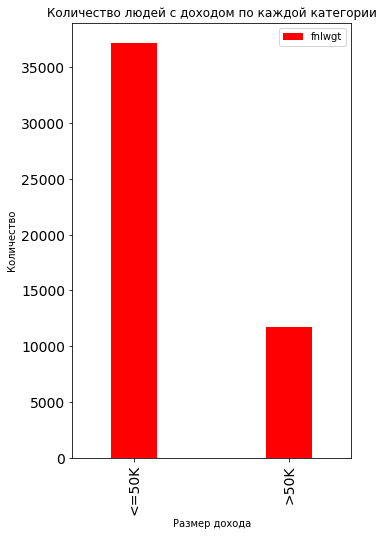

In [ ]:
income_cols.plot(kind='bar', width=0.3, color = 'red', figsize=(5,8), fontsize = 14,
                     title='Количество людей с доходом по каждой категории',
                     xlabel='Размер дохода',
                     ylabel='Количество')

In [ ]:
occupation_income = data.filter(items = ['occupation', 'income', 'fnlwgt']).groupby(['occupation', 'income']).count().sort_values(by = 'income', ascending=False)
occupation_income

,,fnlwgt
occupation,income,
Transport-moving,>50K,481
Sales,>50K,1475
Other-service,>50K,204
Adm-clerical,>50K,768
Machine-op-inspct,>50K,372
Protective-serv,>50K,308
Handlers-cleaners,>50K,138
Prof-specialty,>50K,3049
Farming-fishing,>50K,173


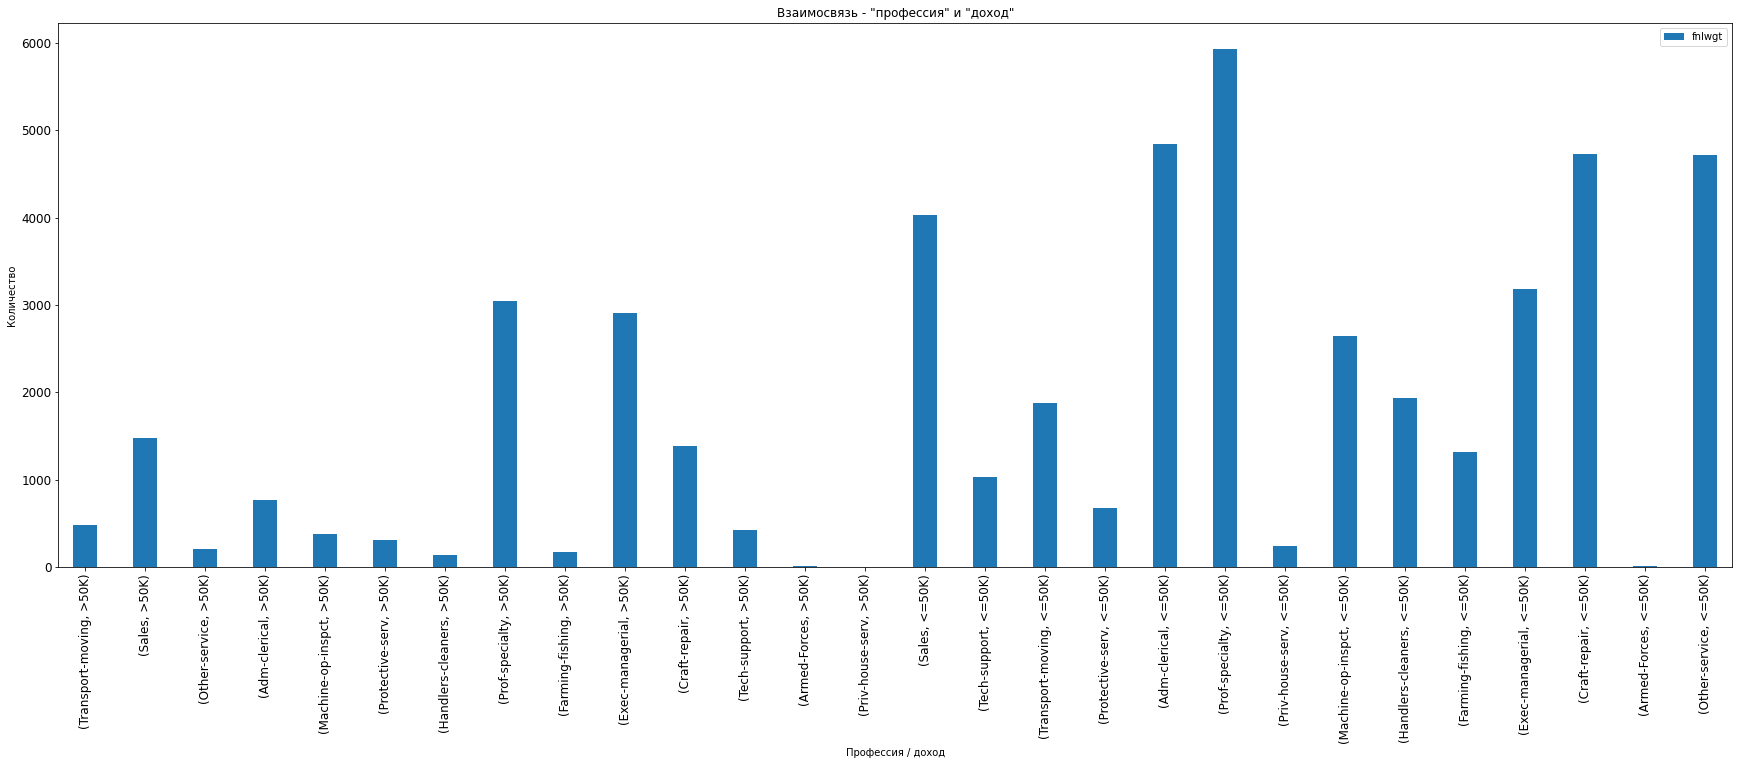

In [ ]:
occupation_income.plot(kind='bar', width=0.4, figsize=(30,10), fontsize = 12,
                     title='Взаимосвязь - "профессия" и "доход"',
                     xlabel='Профессия / доход',
                     ylabel='Количество')

In [ ]:
workclass_income = data.filter(items = ['workclass', 'income', 'fnlwgt']).groupby(['workclass', 'income']).count().sort_values(by = 'income', ascending=False)
workclass_income

,,fnlwgt
workclass,income,
Federal-gov,>50K,561
Local-gov,>50K,927
Private,>50K,7652
Self-emp-inc,>50K,938
Self-emp-not-inc,>50K,1077
State-gov,>50K,530
Without-pay,>50K,2
Federal-gov,<=50K,871
Local-gov,<=50K,2209


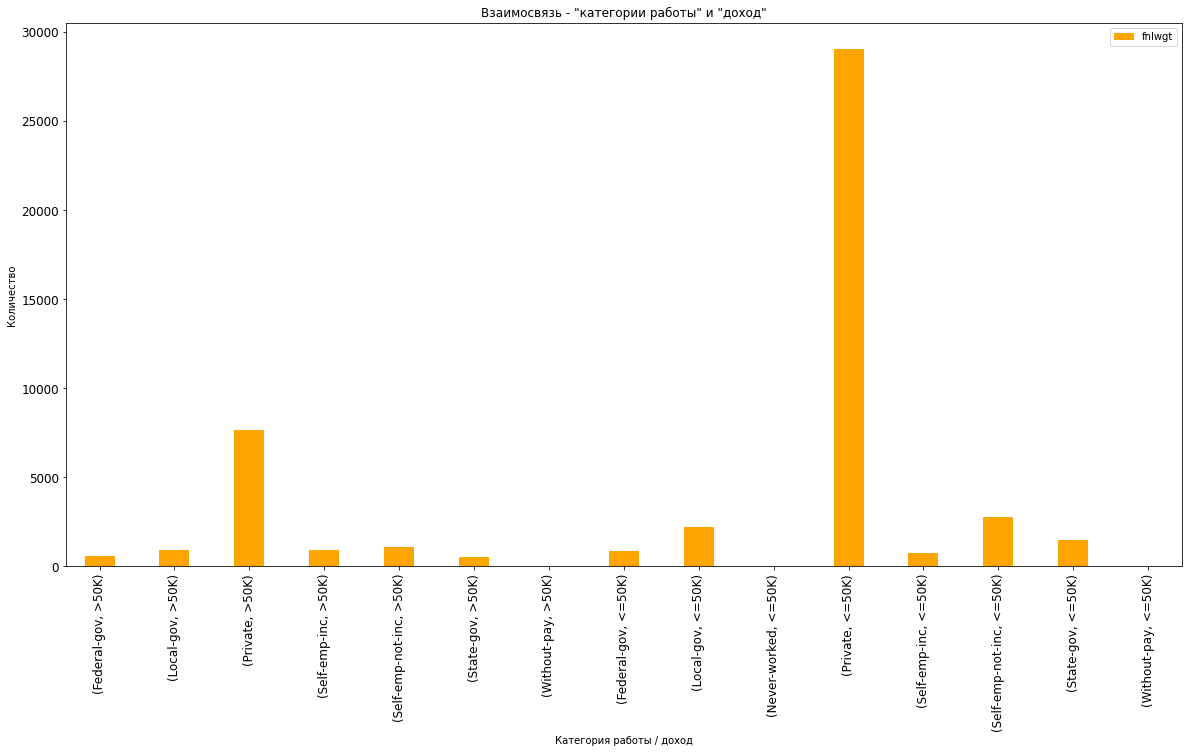

In [ ]:
workclass_income.plot(kind='bar', width=0.4, figsize=(20,10), color = 'orange', fontsize = 12,
                     title='Взаимосвязь - "категории работы" и "доход"',
                     xlabel='Категория работы / доход',
                     ylabel='Количество')

# Преобразование категориальных признаков и обучение

### Работа с датасетом, в котором пропуски заменены модой

In [ ]:
data.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# подготовка таргетной переменной
le.fit( data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
le.transform(['<=50K', '>50K', '<=50K'])

array([0, 1, 0])

In [ ]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
# выбор признаков для обучения модели
selectedColumns = data [['age','marital-status', 'education', 'relationship', 'race', 'gender', 'income']]

# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['marital-status', 'education', 'relationship', 'race', 'gender'])

# столбец income является целевой переменной, удаляем его из Х

del X['income']

X.head()

,age,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,education_10th,education_11th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,38,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
# обучаем на тренировочной части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 1])

In [ ]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.95424402, 0.04575598],
       [0.95459361, 0.04540639],
       [0.81647535, 0.18352465],
       ...,
       [0.95781277, 0.04218723],
       [0.59980502, 0.40019498],
       [0.97791479, 0.02208521]])

In [ ]:
model.score(X_train, y_train)

0.8173096610020767

In [ ]:
model.score(X_test,y_test)

0.8282945471917014

### Обучение второго датасета, где строки с пропусками были удалены

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
le.fit( df['income'])

LabelEncoder()

In [ ]:
le.transform(['<=50K', '>50K', '<=50K'])

array([0, 1, 0])

In [ ]:
y_1 = pd.Series (data = le.transform(df['income']))
y_1.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
# выбор признаков для обучения модели
selectedColumns = df[['age','marital-status', 'education', 'relationship', 'race', 'gender', 'income']]

# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X_1 = pd.get_dummies (selectedColumns, columns = ['marital-status', 'education', 'relationship', 'race', 'gender'])

# столбец income является целевой переменной, удаляем его из Х

del X_1['income']

X.head()

,age,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,education_10th,education_11th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,38,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
model.fit(X_1_train, y_1_train)
predictions = model.predict(X_1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model.score(X_1_train, y_1_train)

0.8154162059706207

In [ ]:
model.score(X_1_test,y_1_test)

0.8186776737672293

**ВЫВОД**: разница в полученном score для датасетов (пропуски, заменные модой и удаленные строки с пропусками) незначительная

# Метод опорных векторов SVM

In [ ]:
from sklearn.svm import SVC
# используем пайплайны
pipclf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Проверка score для тестовой и  тренировочной выборок

In [ ]:
clf.score(X_train, y_train)

0.8211705519319079

In [ ]:
clf.score(X_test, y_test)

0.818898798555318

Без StandardScaler результат стал лучше:

In [ ]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
svc.score(X_train, y_train)

0.8229840007019802

In [ ]:
svc.score(X_test, y_test)

0.831433836074524

**Выводы по проделанной работе:**

1. В работе были исследованы данные и обнаружены пропуски в виде знака '?', пропуски в первом случае заменены модой, во втором случае строки с пропусками удалены. При обучении на обоих вариантах результат отличается незначительно, поэтому нет особой разницы как заменить пропуски.

2. При обучении с помощью LogisticRegression и SVC точность обучения примерно одинаковая, чуть лучший результат в случае SVC

3. С поставленной задачей справилась, для улучшения результата можно поэкспериментировать с методами замены пропусков и параметрами модели.